## CLasisfication with Machine Learning

The goal here is to compare some of the most known machine learning method to find out which give the best result in terms of acuracy.

In [19]:
import pandas as pd
df = pd.read_pickle("clean_data.pkl")
df.head()

,No Recession,Recession,Loan_Status,NoRealEstate,RealEstate,Long Term,Short Term,High Risk,Low Risk,New Business,Old Business,Large,Medium,Micro,Small
0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0
1,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0
2,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0
3,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0
4,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1


Cause the goal is to basically predict the loan status (**1=Paid in Full and 0=Charged off**) then we need to separate the to variable X and Y. Variable Y would be Loan_Status and Variable X would be the rest of the data sets.

In [10]:
y = df['Loan_Status']
X = df.drop(['Loan_Status'], axis=1)

In [20]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 481882, 0: 104511})
Counter({1: 237345, 0: 51476})


A little search away of top machine learning algorithm for classification, I found:

**1. Logistic Regression**

**2. KNN**

**3. SVM**

**4. Random Forest**

**5. Naive Bayes**

And I want to addd one more algorithm that is **Stochastic Gradient Descent (SGD)**.

Reference: https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501


In [26]:
#Classification Algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

#Model Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [25]:
ml_algorithms = []
ml_algorithms.append(LogisticRegression())
ml_algorithms.append(KNeighborsClassifier(n_neighbors = int(X.shape[1]/2)))
ml_algorithms.append(SVC(gamma='auto', kernel ='linear'))
ml_algorithms.append(RandomForestClassifier())
ml_algorithms.append(GaussianNB())
ml_algorithms.append(SGDClassifier(loss='modified_huber', shuffle=True))

In [29]:
ml_list=['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Naive Bayes', 'SGD']
acc_list = []
auc_list = []
cm_list = []
mea_list = []
f1_list = []

for ml in ml_algorithms:
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))
    fpr, tpr, _threshold = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))
    mea_list.append(mean_absolute_error(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

In [30]:
result = pd.DataFrame({'Model':ml_list,'confusion_matrix':cm_list, 'f1_score':f1_list, 'accuracy':acc_list, 'AUC':auc_list,
                      'mean_absolute_error':mea_list})
result

,Model,confusion_matrix,f1_score,accuracy,AUC,mean_absolute_error
0,Logistic Regression,"[[2826, 48650], [2807, 234538]]",0.901146,0.821838,0.52,0.178162
1,KNN,"[[2504, 48972], [2237, 235108]]",0.901790,0.822696,0.52,0.177304
2,SVM,"[[0, 51476], [0, 237345]]",0.902168,0.821772,0.50,0.178228
3,Random Forest,"[[2504, 48972], [2235, 235110]]",0.901794,0.822703,0.52,0.177297
4,Naive Bayes,"[[42328, 9148], [129205, 108140]]",0.609870,0.520973,0.64,0.479027
5,SGD,"[[2723, 48753], [2575, 234770]]",0.901457,0.822284,0.52,0.177716


In [32]:
result.to_pickle("result.pkl")

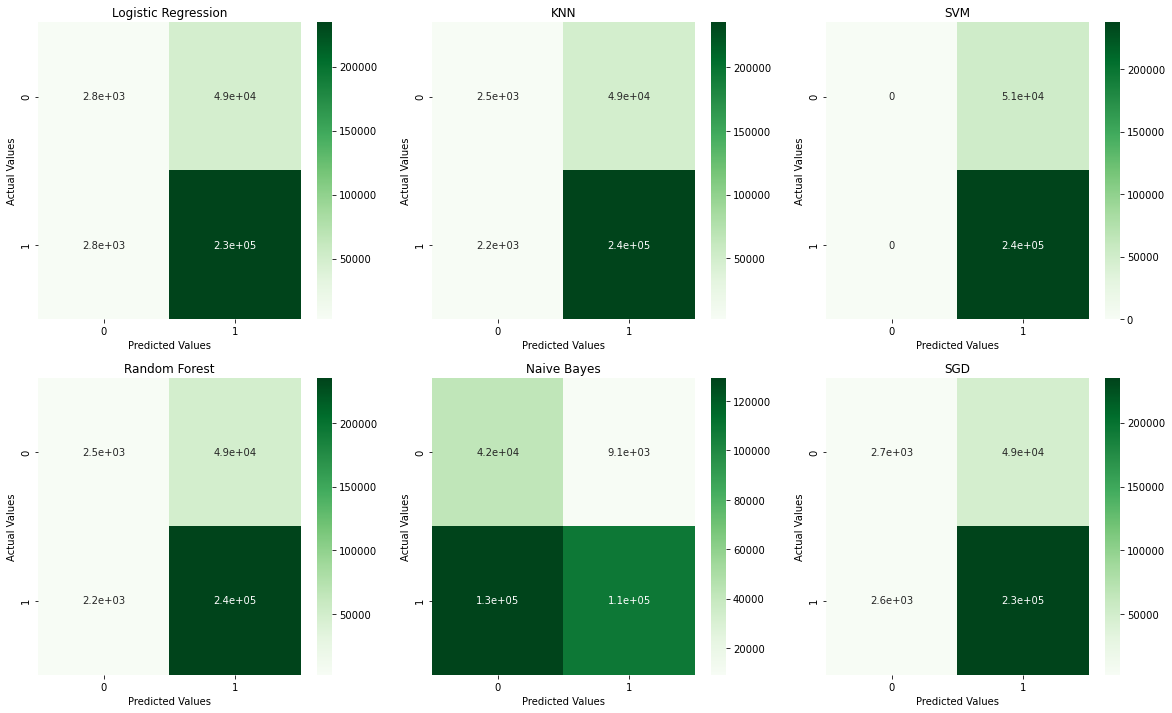

In [43]:
#Let's See the Result of Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20,12))
for i in range(len(cm_list)):
    cm = cm_list[i]
    ml = ml_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(ml)
    cm_plot = sns.heatmap(cm, annot=True, cmap='Greens')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")
